In [348]:
# pandas nodig om bestanden te importeren

import pandas as pd
from datetime import datetime
import numpy as np
import pandas.api.types as ptypes


In [349]:
# excel bestand maxilia geimporteerd en kolommen gefilterd 

data = pd.read_excel(r'/Users/lisannepeeters/Downloads/Dierenapotheek-CLV.xlsx')
df = pd.DataFrame(data, columns = ['Email','Orderdate','OrderID',
                                   'Price'])

df.head()

,Email,Orderdate,OrderID,Price
0,mirandaverhoeff@ziggo.nl,2018-12-31,100040386,14.45
1,j.hydra1@chello.nl,2018-12-31,100040385,110.85
2,arrowsflight123@gmail.com,2018-12-31,100040381,116.85
3,m.keesmekers@gmail.com,2018-12-31,100040384,6.40
4,scrabble1@kpnmail.nl,2018-12-31,100040383,51.20


In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8781 entries, 0 to 8780
Data columns (total 4 columns):
Email        8780 non-null object
Orderdate    8781 non-null object
OrderID      8781 non-null int64
Price        8780 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 274.5+ KB


In [351]:
df['Orderdate']=pd.to_datetime(df['Orderdate'], format='%Y-%m-%d')


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8781 entries, 0 to 8780
Data columns (total 4 columns):
Email        8780 non-null object
Orderdate    8781 non-null datetime64[ns]
OrderID      8781 non-null int64
Price        8780 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 274.5+ KB


In [353]:
df.describe()

,OrderID,Price
count,8.781000e+03,8780.000000
mean,1.005246e+08,40.003731
std,2.645655e+07,32.660921
min,1.000304e+08,0.170000
25%,1.000331e+08,19.200000
50%,1.000355e+08,30.450000
75%,1.000380e+08,55.000000
max,1.532348e+09,742.800000


In [354]:
assert ptypes.is_datetime64_any_dtype(df['Orderdate'])


In [355]:
# group by Accountnumber (= customer ID)
# hier kan je de datum importeren voor wellicht de trendlijn (?)
# hoeveel orders zijn er gedaan per Accountnumber
# totale uitgaven per Accountnumber 

df_clv = df.groupby('Email').aggregate({
                                                        'Orderdate': lambda date: (date.max() - date.min()).days,    
                                                        'OrderID': lambda num: len(num), 
                                                        'Price': lambda price: price.sum()
                                                    }) 
df_clv.head()

,Orderdate,OrderID,Price
Email,,,
040dave@gmail.com,0,1,12.95
045043@kpnmail.nl,0,1,46.90
1.annemie@telenet.be,1,2,427.60
123karineric@casema.nl,0,1,15.25
133850ron@gmail.com,0,1,41.20


In [356]:
# rename kolommen 

df_clv.columns = ['days_customer', 'total_transactions', 'total_spent']
df_clv.head()

,days_customer,total_transactions,total_spent
Email,,,
040dave@gmail.com,0,1,12.95
045043@kpnmail.nl,0,1,46.90
1.annemie@telenet.be,1,2,427.60
123karineric@casema.nl,0,1,15.25
133850ron@gmail.com,0,1,41.20


In [357]:
df_clv.describe()

,days_customer,total_transactions,total_spent
count,6905.000000,6905.000000,6905.000000
mean,17.602317,1.271542,50.863912
std,51.784164,0.830497,71.341310
min,0.000000,1.000000,5.900000
25%,0.000000,1.000000,19.700000
50%,0.000000,1.000000,32.950000
75%,0.000000,1.000000,59.400000
max,305.000000,15.000000,2212.000000


In [358]:
# berekenen van totale CLV 

In [359]:
# gemiddelde order waarde 

avg_order_value = sum(df_clv['total_spent']) / sum(df_clv['total_transactions'])
print(avg_order_value)

40.0017437357644


In [360]:
# hoe vaak koopt iemand gemiddeld iets

purchase_frequency = sum(df_clv['total_transactions']) / df_clv.shape[0]
print(purchase_frequency)

1.271542360608255


In [361]:
# hoe vaak komt iemand terug

repeat_rate = df_clv[df_clv.total_transactions > 1].shape[0] / df_clv.shape[0] 
print(repeat_rate)

0.16046343229543808


In [362]:
# churnrate: hoeveel % doet na 1 aankoop geen bestelling meer

churn_rate = 1 - repeat_rate
print(churn_rate)

0.8395365677045619


In [363]:
# gemiddelde marge  

#profit = sum(df_no_missing['TurnoverLead']) - sum(df_no_missing['BuyinLead'])
#margin = profit / sum(df_no_missing['TurnoverLead'])
    
#print(margin)"

In [364]:
# totale clv

total_clv = (avg_order_value * purchase_frequency) / churn_rate 

print(total_clv) 

60.58570122477341


In [365]:
# visuele weergaven van beschrijvende statitiek clv 

In [366]:
# clv per customer

df_clv['customer_order_value'] = df_clv['total_spent'] / df_clv['total_transactions']
df_clv['customer_total_clv'] = (df_clv['customer_order_value'] * purchase_frequency) / churn_rate 

df_clv.head()

,days_customer,total_transactions,total_spent,customer_order_value,customer_total_clv
Email,,,,,
040dave@gmail.com,0,1,12.95,12.95,19.613766
045043@kpnmail.nl,0,1,46.90,46.90,71.033638
1.annemie@telenet.be,1,2,427.60,213.80,323.816457
123karineric@casema.nl,0,1,15.25,15.25,23.097292
133850ron@gmail.com,0,1,41.20,41.20,62.400552


In [367]:
# Uiteenzetting uitgaves klanten per maand
df['month_yr'] = df['Orderdate'].apply(lambda x: x.strftime('%b-%Y'))
df.head()

,Email,Orderdate,OrderID,Price,month_yr
0,mirandaverhoeff@ziggo.nl,2018-12-31,100040386,14.45,Dec-2018
1,j.hydra1@chello.nl,2018-12-31,100040385,110.85,Dec-2018
2,arrowsflight123@gmail.com,2018-12-31,100040381,116.85,Dec-2018
3,m.keesmekers@gmail.com,2018-12-31,100040384,6.40,Dec-2018
4,scrabble1@kpnmail.nl,2018-12-31,100040383,51.20,Dec-2018


In [368]:
sale=df.pivot_table(index=['Email'],columns=['month_yr'],values='Price',aggfunc='sum',fill_value=0).reset_index()
sale.head()

month_yr,Email,Apr-2018,Aug-2018,Dec-2018,Feb-2018,Jan-2019,Jul-2018,Jun-2018,Mar-2018,May-2018,Nov-2018,Oct-2018,Sep-2018
0,040dave@gmail.com,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,12.95,0.00,0.0
1,045043@kpnmail.nl,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,46.9
2,1.annemie@telenet.be,0.0,87.95,0.0,0.0,0.0,339.65,0.0,0.0,0.0,0.00,0.00,0.0
3,123karineric@casema.nl,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,15.25,0.0
4,133850ron@gmail.com,0.0,0.00,0.0,0.0,0.0,41.20,0.0,0.0,0.0,0.00,0.00,0.0


In [369]:
sale['value_per_customer']=sale.iloc[:,2:].sum(axis=1)
sale.head()

month_yr,Email,Apr-2018,Aug-2018,Dec-2018,Feb-2018,Jan-2019,Jul-2018,Jun-2018,Mar-2018,May-2018,Nov-2018,Oct-2018,Sep-2018,value_per_customer
0,040dave@gmail.com,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,12.95,0.00,0.0,12.95
1,045043@kpnmail.nl,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,46.9,46.90
2,1.annemie@telenet.be,0.0,87.95,0.0,0.0,0.0,339.65,0.0,0.0,0.0,0.00,0.00,0.0,427.60
3,123karineric@casema.nl,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,15.25,0.0,15.25
4,133850ron@gmail.com,0.0,0.00,0.0,0.0,0.0,41.20,0.0,0.0,0.0,0.00,0.00,0.0,41.20


In [370]:
#totale transacties / opbrengst per maand

df_transacties = df.groupby('month_yr').aggregate({
                                                        'OrderID': lambda num: len(num), 
                                                        'Price': lambda price: price.sum(),
                                                        'Email': pd.Series.nunique
                                                    }) 
df_transacties.head()

,OrderID,Price,Email
month_yr,,,
Apr-2018,955,39107.40,917
Aug-2018,1001,39136.85,966
Dec-2018,623,25098.36,597
Feb-2018,187,7517.85,183
Jan-2019,4,123.25,4


In [371]:
df_transacties.columns = ['total_transactions', 'total_spent', 'total_unique_customers']
df_transacties.head()

,total_transactions,total_spent,total_unique_customers
month_yr,,,
Apr-2018,955,39107.40,917
Aug-2018,1001,39136.85,966
Dec-2018,623,25098.36,597
Feb-2018,187,7517.85,183
Jan-2019,4,123.25,4


In [372]:
# statistieken van clv per customer wanneer rekening wordt gehouden met de marge

import statistics

df_clv_list = df_clv['customer_total_clv'].values

x1 = statistics.mean(df_clv_list) # eerste getal is gemiddelde
x2 = statistics.median(df_clv_list) # tweede getal is mediaan
x3 = statistics.mode(df_clv_list) # derde getal is de modus 
x4 = statistics.stdev(df_clv_list) # vierde getal is de standaarddeviatie 

print(x1) 
print(x2) 
print(x3) 
print(x4)

57.033181907385384
43.61980334655857
25.596342936001385
42.56527419066445


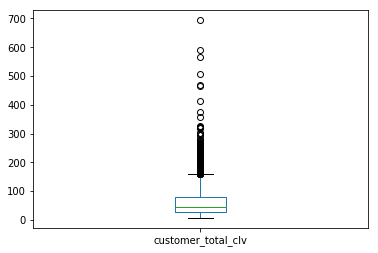

In [373]:
# box plot: visuele weergaven van de verdeling van de clv wanneer rekening wordt gehouden met de marge
# zichtbaar = minimum, maximum, mediaan en kwartielafstanden 

import matplotlib.pyplot as plt 
df_clv.plot(y = 'customer_total_clv', kind = 'box') 
plt.show()

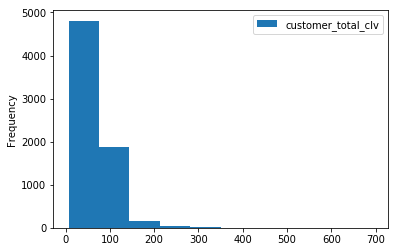

In [374]:
# histogram plot: visuele weergaven van frequentie verdeling van de clv wanneer rekening wordt gehouden met de marge
# hoe vaak komt een clv waarde voor 

import matplotlib.pyplot as plt 
df_clv.plot(y = 'customer_total_clv', kind = 'hist') 
plt.show()